In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import nltk
import seaborn as sns
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [4]:
x = pd.read_csv("C:/Users/PRIYANKA B/Downloads/sms-spam.csv")
x

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
x.shape

(5572, 5)

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
x.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)
x

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [8]:
x.rename(columns = {'v1':'result', 'v2':'input'}, inplace=True)
x

,result,input
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
encoder = LabelEncoder()
x['result'] = encoder.fit_transform(x['result'])
x.head()

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
x.isnull().sum()

result    0
input     0
dtype: int64

In [11]:
x.duplicated().sum()

np.int64(403)

In [12]:
x = x.drop_duplicates(keep='first')
x

,result,input
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
x['result'].value_counts()

result
0    4516
1     653
Name: count, dtype: int64

In [14]:
653*100.0/5169

12.633004449603405

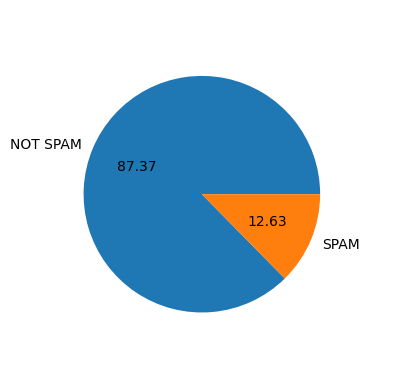

In [15]:
plt.pie(x['result'].value_counts(),  labels = ['NOT SPAM', 'SPAM'], autopct = '%0.2f', radius = 0.8)
plt.show()

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\PRIYANKA
[nltk_data]     B\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\PRIYANKA
[nltk_data]     B\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [28]:
import nltk
print(nltk.data.path)

['C:\\Users\\PRIYANKA B/nltk_data', 'C:\\Users\\PRIYANKA B\\AppData\\Local\\Programs\\Python\\Python310\\nltk_data', 'C:\\Users\\PRIYANKA B\\AppData\\Local\\Programs\\Python\\Python310\\share\\nltk_data', 'C:\\Users\\PRIYANKA B\\AppData\\Local\\Programs\\Python\\Python310\\lib\\nltk_data', 'C:\\Users\\PRIYANKA B\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [29]:
nltk.data.path.append('C:/Users/PRIYANKA B/nltk_data')
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\PRIYANKA
[nltk_data]     B\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to C:\Users\PRIYANKA
[nltk_data]     B\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [37]:
#creating a new column with count of characters
x['countCharacters'] = x['input'].apply(len)

#creating a new column with count of words
x['countWords'] = x['input'].apply(lambda i:len(nltk.word_tokenize(i)))
#'word_tokenize' function takes a string of text as input and returns a list of words

#creating a new column with count of sentences
x['countSentences'] = x['input'].apply(lambda i:len(nltk.sent_tokenize(i)))
#'sent_tokenize' function takes a string of text as input and returns a list of sentences

In [38]:
x.head()

,input,countCharacters,countWords,countSentences
0,This is a test.,15,5,1
1,Another sentence here!,22,4,1


In [39]:
x[['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,2.000000,2.000000,2.0
mean,18.500000,4.500000,1.0
std,4.949747,0.707107,0.0
min,15.000000,4.000000,1.0
25%,16.750000,4.250000,1.0
50%,18.500000,4.500000,1.0
75%,20.250000,4.750000,1.0
max,22.000000,5.000000,1.0


In [51]:
# Check if 'result' column exists
print("Columns in DataFrame:", x.columns)

# Debug DataFrame content
print("First few rows:\n", x.head())
print("DataFrame info:")
print(x.info())

# Ensure the 'result' column exists
if 'result' not in x.columns:
    print("The 'result' column is missing. Creating it with placeholder values.")
    x['result'] = 0  # Replace this logic as needed

# Ensure filtering and selection are correct
try:
    filtered_data = x.loc[x['result'] == 0, ['countCharacters', 'countWords', 'countSentences']].describe()
    print(filtered_data)
except KeyError as e:
    print("KeyError:", e)
    print("Ensure all selected columns exist in the DataFrame.")


Columns in DataFrame: Index(['input', 'countCharacters', 'countWords', 'countSentences'], dtype='object')
First few rows:
                     input  countCharacters  countWords  countSentences
0         This is a test.               15           5               1
1  Another sentence here!               22           4               1
DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   input            2 non-null      object
 1   countCharacters  2 non-null      int64 
 2   countWords       2 non-null      int64 
 3   countSentences   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None
The 'result' column is missing. Creating it with placeholder values.
       countCharacters  countWords  countSentences
count         2.000000    2.000000             2.0
mean         18.500000    4.500000             

In [52]:
x[x['result'] == 0][['countCharacters', 'countWords', 'countSentences']].describe()

,countCharacters,countWords,countSentences
count,2.000000,2.000000,2.0
mean,18.500000,4.500000,1.0
std,4.949747,0.707107,0.0
min,15.000000,4.000000,1.0
25%,16.750000,4.250000,1.0
50%,18.500000,4.500000,1.0
75%,20.250000,4.750000,1.0
max,22.000000,5.000000,1.0


<Axes: xlabel='countCharacters', ylabel='Count'>

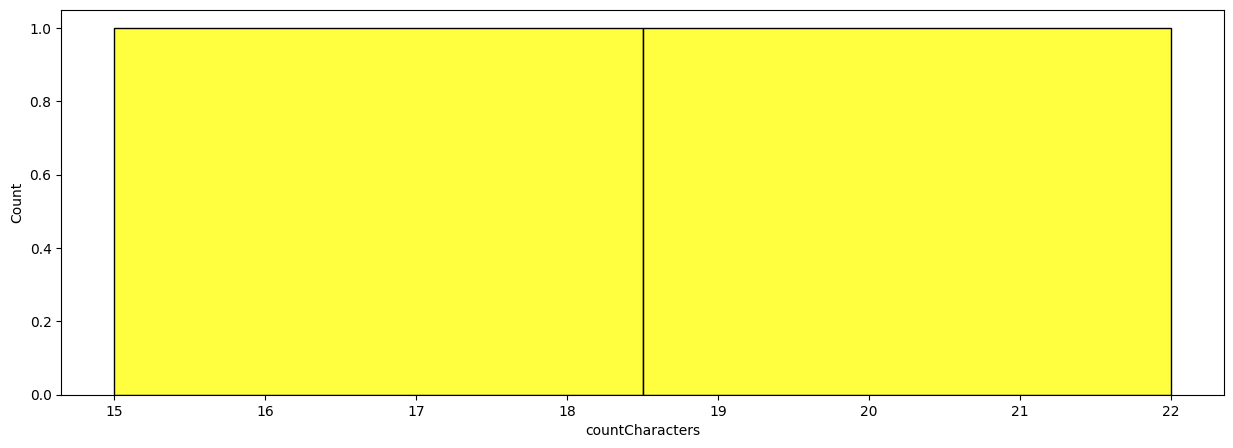

In [53]:
#for better visualization, we will plot a histogram using 'seaborn'
plt.figure(figsize = (15, 5))
sns.histplot(x[x['result'] == 0]['countCharacters'], color = "yellow")
sns.histplot(x[x['result'] == 1]['countCharacters'], color = "black")

#black -> SPAM, yellow -> not SPAM

<Axes: xlabel='countWords', ylabel='Count'>

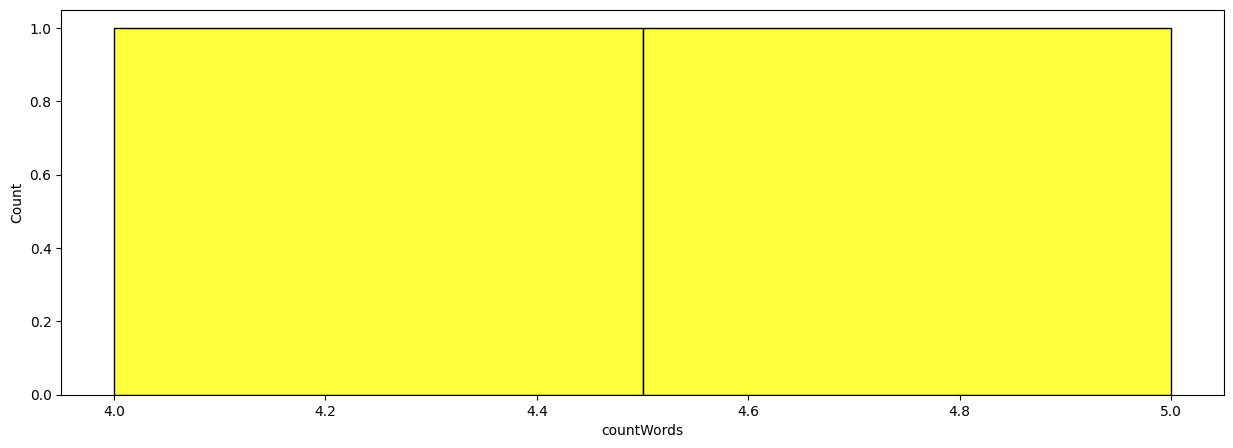

In [54]:
plt.figure(figsize = (15, 5))
sns.histplot(x[x['result'] == 0]['countWords'], color = "yellow")
sns.histplot(x[x['result'] == 1]['countWords'], color = "black")

#black -> SPAM, yellow -> not SPAM

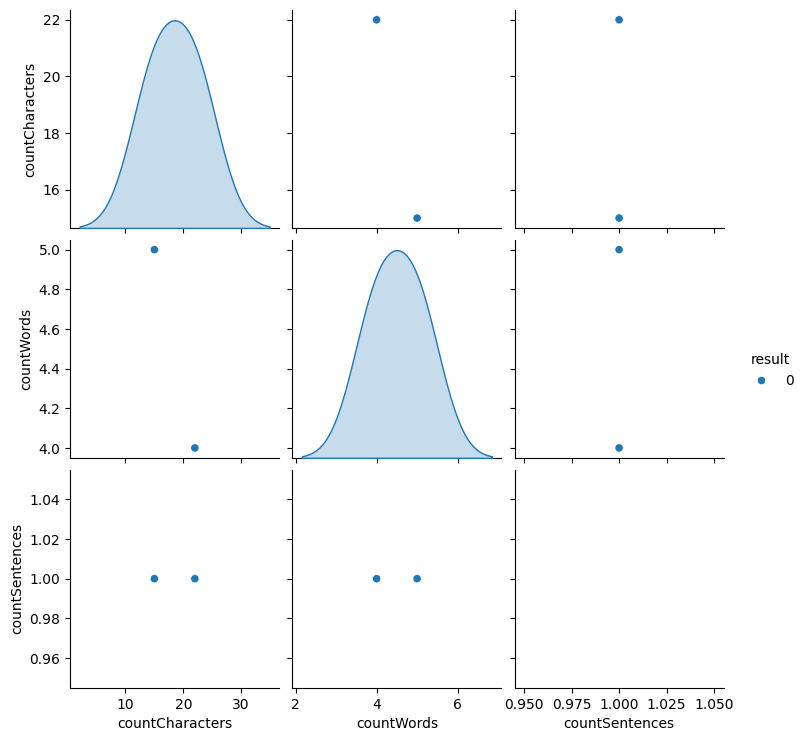

In [55]:
sns.pairplot(x, hue='result')

In [56]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\PRIYANKA
[nltk_data]     B\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [57]:
def transform_text (text):
    
    #converting to lower case
    text = text.lower()
    
    #tokenization
    text = nltk.word_tokenize(text)
    
    #removing special characters
    removedSC = list()
    for i in text:
        if i.isalnum():
            removedSC.append(i)
            
    #updating the text after removed special characters
    text = removedSC[:]
    
    #removing stop words and punctuation characters
    removedSWPC = list()
    for i in text:
        #stopwords.words('english') is a function of 'nltk', returns list of english stop words
        #string.punctuation is a part of 'string' module, containing the ASCII punctuation characters
        if i not in stopwords.words('english') and i not in string.punctuation:
            removedSWPC.append(i)
            
    #updating the text after removed stop words and punctuation characters
    text = removedSWPC[:]
    
    #stemming the data using 'PorterStemmer' algorithm.
    #nltk module provides this class to use.
    ps = PorterStemmer()
    stemmed = list()
    for i in text:
        stemmed.append(ps.stem(i))
    text = stemmed[:]
    return " ".join(text)

In [58]:
x['processed'] = x['input'].apply(transform_text)
x.head()

,input,countCharacters,countWords,countSentences,result,processed
0,This is a test.,15,5,1,0,test
1,Another sentence here!,22,4,1,0,anoth sentenc


In [59]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')

In [65]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Filter the data
filtered_df = x[x['result'] == 1]

# Check if the 'processed' column exists
if 'processed' in filtered_df.columns:
    # Concatenate the text
    processed_text = filtered_df['processed'].dropna().str.cat(sep=" ")

    # Check if the processed_text is valid
    if processed_text.strip():  # Ensures it's not empty
        try:
            wc = WordCloud()
            spamWC = wc.generate(processed_text)

            # Plot the word cloud
            plt.figure(figsize=(12, 6))
            plt.imshow(spamWC, interpolation='bilinear')
            plt.axis("off")
            plt.show()

        except ValueError as e:
            print(f"WordCloud generation failed: {e}")
    else:
        print("Processed text is empty. Cannot generate word cloud.")
else:
    print("The column 'processed' does not exist in the DataFrame.")


Processed text is empty. Cannot generate word cloud.


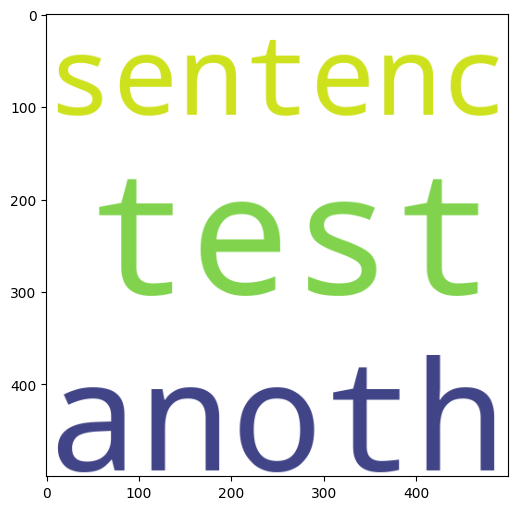

In [67]:
#creating a wordcloud for the not SPAM messages
spamWC = wc.generate(x[x['result'] == 0]['processed'].str.cat(sep=" "))

#creating figure and displaying
plt.figure(figsize=(12, 6))
plt.imshow(spamWC)

In [68]:
#extracting all the words used in SPAM messages
spamWords = list()

for msg in x[x['result'] == 1]['processed'].tolist():
  for word in msg.split():
    spamWords.append(word)

spamWords

[]

In [69]:
#to count the frequency of the words, we will be using the Counter class to create a dictionary
spamWordsDictionary = Counter(spamWords)

#to extract the most common words
spamWordsDictionary.most_common(40)

[]

In [70]:
#converting this dictionary to a dataframe
mostCommonSPAM = pd.DataFrame(spamWordsDictionary.most_common(40))

In [72]:
#converting the collection of text into a matrix of token counts
cv = CountVectorizer()

In [73]:
#transforming the data of processed column
X = cv.fit_transform(x['processed']).toarray()

#printing size of X
X.shape

(2, 3)

In [74]:
#storing the values of the 'result' column
y = x['result'].values
y

array([0, 0])

In [75]:
#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [76]:
#creating the objects for the models
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [77]:
#training the dataset for GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

1.0
[[1]]
0.0


C:\Users\PRIYANKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\PRIYANKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\PRIYANKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: invalid value encountered in subtract
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\PRIYANKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\

In [78]:
#training the dataset for MultinomialnNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

1.0
[[1]]
0.0


C:\Users\PRIYANKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\PRIYANKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [79]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

1.0
[[1]]
0.0


C:\Users\PRIYANKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\PRIYANKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [80]:
#we have to focus mainly on 'precision' value
#the max precision we got is 9.45 with 9.64 as accuracy

In [81]:
#using 'TfidfVectorizer' for vectorization 
tf = TfidfVectorizer()

#transforming the data of processed column
X = tf.fit_transform(x['processed']).toarray()

#storing the values of the 'result' column
y = x['result'].values

#splitting the training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 49)

In [82]:
#training the dataset for GaussianNB
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

1.0
[[1]]
0.0


C:\Users\PRIYANKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:513: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\PRIYANKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: divide by zero encountered in divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\PRIYANKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\naive_bayes.py:514: RuntimeWarning: invalid value encountered in subtract
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)
C:\Users\PRIYANKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\

In [83]:
#training the dataset for MultinomialnNB
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

1.0
[[1]]
0.0


C:\Users\PRIYANKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\PRIYANKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [84]:
#training the dataset for BernoulliNB
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

1.0
[[1]]
0.0


C:\Users\PRIYANKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(
C:\Users\PRIYANKA B\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [86]:
#we will pickle 2 files
import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))